# Preprocessing census data USA
### *Green in the city*

This script extracts the needed data from the census file of a city in the
United States of America. The data is cleaned and merged with a shapefile,
containing the geospatial data linked to the census data. The censusfiles
have to be downloaded from https://data.census.gov/cedsci/ and the shapefile has to contain a column with the same identifiers in order to be able
to merge both datasets. This shapefile can be found here:  https://www.census.gov/cgi-bin/geo/shapefiles/index.php. Select the same year as the year of the census data. The census tracts slightly change over the years. Make also sure to select census tracts. In the following window you can download the shapefile for the state of your interest.

## 1. Preparing the notebook
In order for this notebook to work, the packages *numpy*, *pandas* and *geopandas* have to be installed. Also the package *censusclean* must be available in the repository and the folder *Raw data* must be present. Please paste the location of the repository's main directory in the variable path.

In [1]:
#%% Preamble
# Change this path to the main project folder
path = "C:/Users/sande/OneDrive - UGent/Green in the city/Green_in_the_city"
import sys
import os
os.chdir(path)
sys.path.append(path)
if os.path.exists('Data preparation/Raw data/')==False:
    print('Warning: The folder with the raw data is not present in the directory "Data preparation"')
if os.path.exists('censusclean/')==False:
    print('Warning: package "censusclean" not found.')
%pip install -r requirements.txt
import pandas as pd
import numpy as np
import censusclean.censusclean as cc
from censusclean.data_cleaning_USA import clean_census_us
import geopandas as gpd

Note: you may need to restart the kernel to use updated packages.


## 2. Load data
In the second step the census data is loaded. The census data is stored in different files by topic. Each file contains detailed information about the theme in question. In this workshop, however, only very general information will be used and thus the data should first be cleaned up considerably. 

### Demographics: S0101
The first variable looked at is demographics. As mentioned before the data can be found on the following website: https://data.census.gov/. Here you can search for the variable and the location. For example, If you want demographic data for Atlanta search "Age in Atlanta." To get the data on census tracts, click Geography and then click "Census tracts." Select the census tracts from the area of interest. You had better select additional census tracts to be sure the entire area of interest is selected. To make sure you download the right datasets, the code of the dataset should be the same as the code mentioned with each variable.

After a brief exploration of the file, it can be decided that only the columns starting with "Estimate!!Total!!!" contain the necessary information and that this prefix does not provide any additional information after selecting the columns. By passing this string as an argument to the function *clean_census_us*, the data will retain only the columns with this prefix in the name and the prefix will be removed from these names. This will create a much clearer overview of the variables.

After the data is tidied up, the useful variables are sought. These are selected from the data, but this will not involve renaming.

In [3]:
#%% Demographic distribution
# Clean DataFrame:
filename_age = ('Data preparation/Raw data/United States/Social_data_Atlanta_Atlanta/Age_and_sex/'
                'ACSST5Y2020.S0101-Data.csv')
data_age = clean_census_us(
    filename_age,
    'Estimate!!Total!!'
    )

# Select wanted variables from cleaned data frame
# - By name
selected_col = np.array(pd.Series(data_age.columns
                                  ).str.startswith('total population age'))
# - By index (geographic info)
selected_col[[2,-2,-1]] = True
data_age = data_age.loc[:,selected_col]
# Show data frame
data_age.head()

,total population,total population age under 5 years,total population age 5 to 9 years,total population age 10 to 14 years,total population age 15 to 19 years,total population age 20 to 24 years,total population age 25 to 29 years,total population age 30 to 34 years,total population age 35 to 39 years,total population age 40 to 44 years,...,total population age 50 to 54 years,total population age 55 to 59 years,total population age 60 to 64 years,total population age 65 to 69 years,total population age 70 to 74 years,total population age 75 to 79 years,total population age 80 to 84 years,total population age 85 years and over,census tract,county
0,3269,177,259,180,364,155,223,165,251,209,...,310,150,133,201,137,123,34,49,9501,Appling
1,2276,67,134,106,165,253,128,110,64,152,...,124,137,360,123,41,9,102,32,9502.01,Appling
2,2504,126,175,219,125,161,181,183,259,154,...,106,147,75,136,48,124,25,62,9502.02,Appling
3,3008,265,255,184,320,0,39,177,171,327,...,266,157,194,124,201,87,27,146,9503.01,Appling
4,1729,118,161,83,99,34,136,104,64,87,...,177,186,101,38,102,11,99,0,9503.02,Appling


The data frame found contains information regarding the total population, the population by age group, the IDs of the census tracts and the name of the counties. These last 2 are very important for linking the census data to the geographic location further on.

The same method is used for the other files containing interesting variables for the workshop. After cleaning the file, the data is merged with the previous data based on the geographical information.

### Employment: S2301

In [4]:
#%% Unemployment
# Clean DataFrame
filename_unemployment = ('Data preparation/Raw data/United States/Social_data_Atlanta/Employment/'
                         'ACSST5Y2020.S2301-Data.csv')
data_unemployment = clean_census_us(
    filename_unemployment,
    'Estimate!!')
# Select wanted variables from cleaned data frame
selected_col = np.array(pd.Series(data_unemployment.columns
                                   ).str.startswith('unemployment rate '
                                                    'population 20'))
selected_col[[-2,-1]] = True
data_unemployment = data_unemployment.loc[:,selected_col]
# Narrowing the selection
data_unemployment = data_unemployment.iloc[:,[0,-2,-1]]
# Merge with previous dataframe
data_census = data_age.merge(data_unemployment,
                             how = 'outer', on= ['census tract','county'])
data_census.head()

,total population,total population age under 5 years,total population age 5 to 9 years,total population age 10 to 14 years,total population age 15 to 19 years,total population age 20 to 24 years,total population age 25 to 29 years,total population age 30 to 34 years,total population age 35 to 39 years,total population age 40 to 44 years,...,total population age 55 to 59 years,total population age 60 to 64 years,total population age 65 to 69 years,total population age 70 to 74 years,total population age 75 to 79 years,total population age 80 to 84 years,total population age 85 years and over,census tract,county,unemployment rate population 20 to 64 years
0,3269,177,259,180,364,155,223,165,251,209,...,150,133,201,137,123,34,49,9501,Appling,3.7
1,2276,67,134,106,165,253,128,110,64,152,...,137,360,123,41,9,102,32,9502.01,Appling,1.0
2,2504,126,175,219,125,161,181,183,259,154,...,147,75,136,48,124,25,62,9502.02,Appling,8.3
3,3008,265,255,184,320,0,39,177,171,327,...,157,194,124,201,87,27,146,9503.01,Appling,2.9
4,1729,118,161,83,99,34,136,104,64,87,...,186,101,38,102,11,99,0,9503.02,Appling,5.7


### Income: S1901

In [5]:
#%% Income
# Clean DataFrame
filename_income = ('Data preparation/Raw data/United States/Social_data_Atlanta/Income/'
                   'ACSST5Y2020.S1901-Data.csv')
data_income = clean_census_us(
    filename_income,
    'Estimate!!Households!!')
# Select wanted variables from cleaned data frame
selected_col = np.array(pd.Series(data_income.columns
                                   ).str.startswith('median income'))
selected_col[-2:] = True
data_income = data_income.loc[:,selected_col]
# Merge with previous dataframes
data_census = data_census.merge(data_income, how = 'outer', 
                                on= ['census tract','county'])
data_census.head()

,total population,total population age under 5 years,total population age 5 to 9 years,total population age 10 to 14 years,total population age 15 to 19 years,total population age 20 to 24 years,total population age 25 to 29 years,total population age 30 to 34 years,total population age 35 to 39 years,total population age 40 to 44 years,...,total population age 60 to 64 years,total population age 65 to 69 years,total population age 70 to 74 years,total population age 75 to 79 years,total population age 80 to 84 years,total population age 85 years and over,census tract,county,unemployment rate population 20 to 64 years,median income (dollars)
0,3269,177,259,180,364,155,223,165,251,209,...,133,201,137,123,34,49,9501,Appling,3.7,48136
1,2276,67,134,106,165,253,128,110,64,152,...,360,123,41,9,102,32,9502.01,Appling,1.0,42857
2,2504,126,175,219,125,161,181,183,259,154,...,75,136,48,124,25,62,9502.02,Appling,8.3,24008
3,3008,265,255,184,320,0,39,177,171,327,...,194,124,201,87,27,146,9503.01,Appling,2.9,44018
4,1729,118,161,83,99,34,136,104,64,87,...,101,38,102,11,99,0,9503.02,Appling,5.7,26318


For the variables containing categorized information, the data cleaning is a little more complicated. For example the educational data contains columns, which represent a detailled classification. For the workshop, a more general classification is used. Hence, the variables have to be summarized. 

The data is summarized and renamed by changing the data frame format to a long format. The variable names are than changed to the new categories and the data is summed par census tract and category. Afterwards the data is transformed back to a wide format.

### Education: S1501

In [6]:
#%% Education
filename_education = ('Data preparation/Raw data/United States/Social_data_Atlanta/Education/'
    'ACSST5Y2020.S1501-Data.csv')
data_education = clean_census_us(
    filename_education,
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population')
# Select wanted variables from cleaned data frame
selected_col = np.array(pd.Series(data_education.columns
                                   ).str.contains('25 years and over'))
selected_col[np.array(pd.Series(data_education.columns
                                   ).str.contains('or higher'))] = False
selected_col[-2:] = True
data_education = data_education.loc[:,selected_col]
# Melt dataframe to easily adapt column names and summarise data
data_edu_long = data_education.melt(id_vars = ['census tract',
                                               'county',
                                               '25 years and over'])
# Change names
data_edu_long.variable = data_edu_long.variable.str.removeprefix("25 years and over ")
data_edu_long.variable[data_edu_long.variable.str.contains('9')] = "no diploma"
data_edu_long.variable[data_edu_long.variable.str.contains(
    'high|some col')] = "High school"
data_edu_long.variable[data_edu_long.variable.str.contains(
    'degree')] = "degree"
# Summarise by name
data_edu_long = data_edu_long.groupby(by = ['census tract', 'county',
                                            'variable']).sum().reset_index()
data_edu_long.value = data_edu_long.value/data_edu_long['25 years and over']
# Pivot data frame wider
data_education = data_edu_long.pivot(columns = 'variable', 
                                     values = 'value',
                                     index = ['census tract', 'county'])
# Normalize data to correct for estimation errors
data_education = data_education.div(data_education.sum(axis = 1), axis = 0)
data_education =data_education.reset_index()
# Merge with previous dataframes
data_census = data_census.merge(data_education, how = 'outer',
                                on= ['census tract','county'])
data_census.head()

C:\Users\sande\AppData\Local\Temp\ipykernel_21684\2110727525.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edu_long.variable[data_edu_long.variable.str.contains('9')] = "no diploma"
C:\Users\sande\AppData\Local\Temp\ipykernel_21684\2110727525.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_edu_long.variable[data_edu_long.variable.str.contains(
C:\Users\sande\AppData\Local\Temp\ipykernel_21684\2110727525.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,total population,total population age under 5 years,total population age 5 to 9 years,total population age 10 to 14 years,total population age 15 to 19 years,total population age 20 to 24 years,total population age 25 to 29 years,total population age 30 to 34 years,total population age 35 to 39 years,total population age 40 to 44 years,...,total population age 75 to 79 years,total population age 80 to 84 years,total population age 85 years and over,census tract,county,unemployment rate population 20 to 64 years,median income (dollars),High school,degree,no diploma
0,3269,177,259,180,364,155,223,165,251,209,...,123,34,49,9501,Appling,3.7,48136,0.614550,0.171274,0.214177
1,2276,67,134,106,165,253,128,110,64,152,...,9,102,32,9502.01,Appling,1.0,42857,0.619003,0.167210,0.213787
2,2504,126,175,219,125,161,181,183,259,154,...,124,25,62,9502.02,Appling,8.3,24008,0.629841,0.076641,0.293518
3,3008,265,255,184,320,0,39,177,171,327,...,87,27,146,9503.01,Appling,2.9,44018,0.587390,0.138315,0.274295
4,1729,118,161,83,99,34,136,104,64,87,...,11,99,0,9503.02,Appling,5.7,26318,0.583495,0.057238,0.359266


Similar method is used for the housing characteristics, which also need more broad categories for the workshop.

### Housing: S2504

In [7]:
#%% Physical housing charachteristics
# Clean DataFrame
filename_housing = ('Data preparation/Raw data/United States/Social_data_Atlanta/PhysicalHousing/'
    'ACSST5Y2020.S2504-Data.csv')
data_houses = clean_census_us(
    filename_housing,
    'Estimate!!')
# Select wanted variables from cleaned data frame
data_houses = cc.select_by_prefix(data_houses,
                                  "percent occupied housing units occupied "
                                  "housing units",
                                  id_cols= ['census tract', 'county'])
data_houses = data_houses.iloc[:,np.array([0,1] + list(np.arange(3,17)))]
# Rename variables
houses_long = pd.melt(data_houses, id_vars=['census tract','county'])
houses_long.variable[houses_long.variable.str.contains('detached')] = "detached"
houses_long.variable[houses_long.variable.str.contains('attached')] = "attached"
houses_long.variable[houses_long.variable.str.contains('apartment')] = "apartments"
houses_long.variable[houses_long.variable.str.contains('other')] = "other type of housing"
houses_long = houses_long.groupby(by = ['census tract', 'variable',
                                        'county']).sum().reset_index()
data_houses = houses_long.pivot(columns = 'variable', 
                                     values = 'value',
                                     index = ['census tract',
                                              'county']).reset_index()
# Merge with previous dataframes
data_census = data_census.merge(data_houses, how = 'outer', 
                                on = ['census tract', 'county'])

C:\Users\sande\AppData\Local\Temp\ipykernel_21684\1394979476.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_long.variable[houses_long.variable.str.contains('detached')] = "detached"
C:\Users\sande\AppData\Local\Temp\ipykernel_21684\1394979476.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_long.variable[houses_long.variable.str.contains('attached')] = "attached"
C:\Users\sande\AppData\Local\Temp\ipykernel_21684\1394979476.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

### Households: S1101

In [8]:
#%% Households
# Clean DataFrame
filename_households = ('Data preparation/Raw data/United States/Social_data_Atlanta/Households/'
    'ACSST5Y2020.S1101-Data.csv')
data_households = clean_census_us(
    filename_households,
    'Estimate!!')
# Select people living alone
data_households['living alone'] = np.sum(data_households.iloc[:,[38,56]],
                                     axis = 1).div(data_households.iloc[:,2])*100
# Select wanted variables from cleaned data frame
data_households = data_households.iloc[:,-3:]
# Merge with previous dataframes
data_census = data_census.merge(data_households, how = 'outer', 
                                on = ['census tract', 'county'])

### Renter-Owner: S2504

In [9]:
#%% Owner renter
# Clean DataFrame
data_renter = clean_census_us(
    filename_housing,
    'Estimate!!')
houses = data_renter.iloc[:,2]
# Select wanted variables from cleaned data frame
selected_col = np.array(pd.Series(data_renter.columns)
                        .str.startswith('renter-occupied'))
selected_col[-2:] = True
data_renter = data_renter.loc[:,selected_col].iloc[:,[0,-1,-2]]
data_renter.iloc[:,0] = data_renter.iloc[:,0].div(houses)*100
data_renter.rename({"renter-occupied":
                    "renter-occupied housing units occupied housing units"})
# Merge with previous dataframes
data_census = data_census.merge(data_renter, how = 'outer', 
                                on = ['census tract', 'county'])
data_census = cc.set_format_colnames(data_census)
data_census.head()

,total population,total population age under 5 years,total population age 5 to 9 years,total population age 10 to 14 years,total population age 15 to 19 years,total population age 20 to 24 years,total population age 25 to 29 years,total population age 30 to 34 years,total population age 35 to 39 years,total population age 40 to 44 years,...,year structure built 1980 to 1999,year structure built 2000 to 2009,year structure built 2010 to 2013,year structure built 2014 or later,apartments,attached,detached,other type of housing,living alone,renter-occupied housing units occupied housing units
0,3269,177,259,180,364,155,223,165,251,209,...,48.8,12.6,3.6,4.6,0.0,1.5,67.4,31.0,14.684757,21.069433
1,2276,67,134,106,165,253,128,110,64,152,...,53.9,9.1,1.7,2.8,0.0,0.0,59.8,40.2,11.707317,15.243902
2,2504,126,175,219,125,161,181,183,259,154,...,41.1,9.6,0.0,2.1,20.7,1.1,44.9,33.3,23.274854,43.976608
3,3008,265,255,184,320,0,39,177,171,327,...,30.5,11.5,1.5,1.4,5.9,0.0,82.4,11.7,14.860978,29.146692
4,1729,118,161,83,99,34,136,104,64,87,...,24.9,5.4,0.0,0.0,18.3,0.0,52.9,28.8,24.444444,40.694444


## 3. Add geographical information
In this step the census tract boundaries are loaded and merged with the census data.
Since the boundaries change a little over time, it is important to download the corresponding shapefiles (census tracts and counties) using this link: https://www.census.gov/cgi-bin/geo/shapefiles/index.php. 

Some tract ID's can occur twice over different counties, so both tract ID's and county names are used to identifiy the tracts. These variables are however found in different files and hence these geodata frames have to be merged. In order to merge these geographical data frames, they are joined by location (using a function defined in the censusclean package). 

In [11]:
#%% Geographic information
tracts = gpd.read_file('Data preparation/Raw data/United States/'
                       'census_tracts_Georgia/tl_2021_13_tract.shp'
                        )
counties = gpd.read_file('Data preparation/Raw data/United States/'
                         'counties/tl_2022_us_county.shp').rename(columns = {'NAME':'county'})
census = cc.join_by_location(tracts, counties, col_id = 'county')
# Get census tract ID's that match with these in the census data.
census = cc.extract_part(data= census, 
                                 col_id='NAMELSAD', new_id= 'census tract', 
                                 separators = [' '], locations=[2])
census['Area'] = census.to_crs('EPSG:2163').area/1000000 #km²
# Select variables
census = census[['census tract','county', 'Area', 'geometry']]
# Merge with census data
census = census.merge(data_census, how = 'left', 
                                      on= ['census tract', 'county'])

C:\Users\sande\OneDrive - UGent\Green in the city\Green_in_the_city\censusclean\censusclean.py:205: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  samplers.geometry = layer_1.geometry.centroid


## 4. Final data preprocessing
In the next to final step the variables are mutated to new variables to create a more compact data frame. A final selection of variables is made to create a dataframe with more overview.

In [12]:
census.columns = list(census.columns.str.lower())
census['pop_dens'] = (census['total population']
                              /census['area'])
census = census.iloc[(census
                  .iloc[:,4:]
                  .dropna(how='all')
                  .index)]
#%% select and mutate variables to match format wanted by the project
census['under_10'] = census[['total population age under 5 years',
                                          'total population age 5 to 9 years'
                                          ]].sum(axis = 1)
census['under_15'] = census[['total population age under 5 years',
                                          'total population age 5 to 9 years',
                                          'total population age 10 to 14 years'
                                          ]].sum(axis = 1)
census['over_65'] = census[['total population age 65 to 69 years',
                                         'total population age 70 to 74 years',
                                         'total population age 75 to 79 years',
                                         'total population age 80 to 84 years',
                                         'total population age 85 years and over'
                                          ]].sum(axis = 1)
census['over_70'] = census[['total population age 70 to 74 years',
                                         'total population age 75 to 79 years',
                                         'total population age 80 to 84 years',
                                         'total population age 85 years and over'
                                          ]].sum(axis = 1)
census['over_80'] = census[['total population age 80 to 84 years',
                                         'total population age 85 years and over'
                                          ]].sum(axis = 1)
yr_build_i = census.columns.str.contains('year structure built ')
buildings = census.loc[:,yr_build_i]
yr_build = np.array([int(i[21:25]) for i in census.columns[yr_build_i]])
census['pre_1960'] = buildings.loc[:,yr_build<1960].sum(axis = 1)
census['pre_1980'] = buildings.loc[:,yr_build<1980].sum(axis = 1)
census['post_2000'] = buildings.loc[:,yr_build>=2000].sum(axis = 1)
var_oi = ['census tract', 'county', 'area', 'total population', 'pop_dens',
          'median income (dollars)','unemployment rate population 20 to 64 years',
          'total population age under 5 years','under_10','under_15','over_65',
          'over_70','over_80','living alone','no diploma','high school','degree',
          'renter-occupied housing units occupied housing units', 'pre_1960',
          'pre_1980', 'post_2000', 'apartments',
          'attached','detached', 'geometry']
census = census[var_oi]
census.columns = ['tract', 'county', 'area', 'tot_pop', 'pop_dens',
          'med_inc','unempl','under_5_y','under_10_y','under_15_y','over_65_y',
          'over_70_y','over_80_y','alone','no_dipl','high_sch','degree',
          'renter', 'pre_1960','pre_1980', 'post_2000', 'apartments',
          'attached','detached', 'geometry']

## 5. Export census data
In the final step the data is exported as a shp-file.

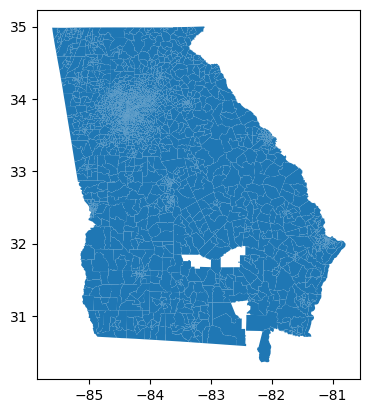

In [13]:
#%% Export shp-file
census.plot()
census.to_file('Data preparation/Raw data/United States/'
                        'census_Georgia/prep_census_georgia.shp')
